In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [106]:
#!pip install pandas-profiling[notebook]

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import IPython.display
%matplotlib inline
from datetime import datetime
from IPython.display import HTML
from pandas_profiling import ProfileReport
from bioinfokit.analys import chisq

import warnings
warnings.filterwarnings("ignore")

# Data

In [2]:
data = pd.read_csv('herolead.csv')
data

,Lead ID,Date,Name,Email,Phone Number,Proram Studi,Source,Media,Status Call
0,L001,2020-06-05 14:04:42,Leads01,Leads01@gmail.com,8.123123e+09,Magister Manajemen Eksekutif Muda (EM),direct,FORM,Interested
1,L002,2020-06-16 15:43:04,Leads02,NaN,6.281320e+12,NaN,CALL,CALL,Relevant
2,L003,2020-06-18 10:24:26,Leads03,Leads03@gmail.com,8.523286e+10,NaN,direct,CHAT,Valid
3,L004,2020-06-18 17:42:04,Leads04,Leads04@gmail.com,8.114454e+09,Magister Manajemen Eksekutif (MM-E),IG,FORM,Relevant
4,L005,2020-06-18 17:43:16,Leads05,Leads05@gmail.com,8.114454e+09,NaN,IG,CHAT,Valid
...,...,...,...,...,...,...,...,...,...
195,L196,2020-07-04 08:55:10,Leads196,Leads196@gmail.com,8.122007e+10,Magister Manajemen Wijawiyata Manajemen (MM-WM),SEM,FORM,Relevant
196,L197,2020-07-04 09:33:49,Leads197,Leads197@gmail.com,8.121452e+10,Magister Manajemen Eksekutif Muda (MM-EM),FB,FORM,Relevant
197,L198,2020-07-04 10:49:11,Leads198,Leads198@gmail.com,8.583424e+10,Magister Manajemen Wijawiyata Manajemen (MM-WM),SEM,FORM,Re-contact
198,L199,2020-07-04 13:02:40,Leads199,Leads199@gmail.com,8.138551e+09,Magister Manajemen Wijawiyata Manajemen (MM-WM),SEM,FORM,NaN


In [3]:
import datetime as dt

def ubah_time(series):

  for_tanggal_trx = []

  for i in series:
    datetime_object = dt.datetime.strptime(i, '%Y-%m-%d %H:%M:%S')
    for_tanggal_trx.append(datetime_object)

  return for_tanggal_trx

# General Overview

In [4]:
profile = ProfileReport(data)
profile

Number of variables,9
Number of observations,200
Total Missing (%),3.2%
Total size in memory,14.2 KiB
Average record size in memory,72.6 B
Numeric,1
Categorical,7
Boolean,0
Date,0
Text (Unique),1
Rejected,0


In [5]:
data[data['Name']=='Leads173']

,Lead ID,Date,Name,Email,Phone Number,Proram Studi,Source,Media,Status Call
172,L173,2020-07-02 18:21:39,Leads173,Leads173@gmail.com,8.578260e+10,Magister Manajemen Wijawiyata Manajemen (MM-WM),SEM,FORM,Valid
173,L174,2020-07-02 18:22:29,Leads173,Leads173@gmail.com,8.578260e+10,Magister Manajemen Wijawiyata Manajemen (MM-WM),SEM,FORM,Relevant


In [6]:
data[data['Name']=='Leads132']

,Lead ID,Date,Name,Email,Phone Number,Proram Studi,Source,Media,Status Call
131,L132,2020-07-01 11:09:46,Leads132,Leads132@gmail.com,8.523851e+10,Magister Manajemen Eksekutif Muda (MM-EM),direct,FORM,Relevant
132,L133,2020-07-01 11:09:47,Leads132,Leads133@gmail.com,8.523851e+10,Magister Manajemen Wijawiyata Manajemen (MM-WM),direct,FORM,Interested


In [7]:
data[data['Name']=='Leads177']

,Lead ID,Date,Name,Email,Phone Number,Proram Studi,Source,Media,Status Call
176,L177,2020-07-03 06:53:50,Leads177,Leads177@gmail.com,6.281310e+12,Magister Manajemen Eksekutif Muda (MM-EM),SEM,FORM,Interested
177,L178,2020-07-03 06:59:06,Leads177,Leads177@gmail.com,8.131433e+10,NaN,SEM,CHAT,Relevant


In [8]:
data[data['Name']=='Leads62']

,Lead ID,Date,Name,Email,Phone Number,Proram Studi,Source,Media,Status Call
61,L062,2020-06-23 21:21:37,Leads62,Leads62@gmail.com,8.124836e+09,NaN,FB,CHAT,Relevant
62,L063,2020-06-23 21:25:33,Leads62,Leads62@gmail.com,8.124836e+09,Magister Manajemen Eksekutif Muda (MM-EM),FB,FORM,Relevant


The name variable has duplicate values

# Feature Selection

some variables will be removed in this step, due to the related variables and conciseness <br>
I use lead id, date, source, media, and status call. The other variables such as name, email, phone number are represented by lead id. Also, program studi has many missing values (23.5%), so it will be removed.

In [9]:
data.columns = ['lead_id', 'date', 'name', 'email', 'phone', 'program', 'source', 'media', 'status_call']
data = data[['lead_id', 'date', 'source', 'media', 'status_call']]
data

,lead_id,date,source,media,status_call
0,L001,2020-06-05 14:04:42,direct,FORM,Interested
1,L002,2020-06-16 15:43:04,CALL,CALL,Relevant
2,L003,2020-06-18 10:24:26,direct,CHAT,Valid
3,L004,2020-06-18 17:42:04,IG,FORM,Relevant
4,L005,2020-06-18 17:43:16,IG,CHAT,Valid
...,...,...,...,...,...
195,L196,2020-07-04 08:55:10,SEM,FORM,Relevant
196,L197,2020-07-04 09:33:49,FB,FORM,Relevant
197,L198,2020-07-04 10:49:11,SEM,FORM,Re-contact
198,L199,2020-07-04 13:02:40,SEM,FORM,NaN


# Handling missing values 
the missing values (2.5%) in status call variable will be removed

In [10]:
data = data[data['status_call'].notnull()]
data

,lead_id,date,source,media,status_call
0,L001,2020-06-05 14:04:42,direct,FORM,Interested
1,L002,2020-06-16 15:43:04,CALL,CALL,Relevant
2,L003,2020-06-18 10:24:26,direct,CHAT,Valid
3,L004,2020-06-18 17:42:04,IG,FORM,Relevant
4,L005,2020-06-18 17:43:16,IG,CHAT,Valid
...,...,...,...,...,...
191,L192,2020-07-03 21:20:57,SEM,FORM,Valid
194,L195,2020-07-04 04:38:20,SEM,FORM,Relevant
195,L196,2020-07-04 08:55:10,SEM,FORM,Relevant
196,L197,2020-07-04 09:33:49,FB,FORM,Relevant


## Visualization

In [13]:
%%HTML 
<div class='tableauPlaceholder' id='viz1602948552370' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;he&#47;hero_16029484676440&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='hero_16029484676440&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;he&#47;hero_16029484676440&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1602948552370');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1227px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [14]:
%%HTML
<div class='tableauPlaceholder' id='viz1602953834754' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;he&#47;hero_16029484676440&#47;Dashboard2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='hero_16029484676440&#47;Dashboard2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;he&#47;hero_16029484676440&#47;Dashboard2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1602953834754');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='1150px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='1150px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## Status call and source --> there is a significant association between status call variable with source variable (0.04 p-value)

---



---




Chi-squared test

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson           20       31.467   0.0493192
Log-likelihood    20       21.1568  0.387954

Expected frequency counts

         CALL         FB         IG        SEM     direct
--  ---------  ---------  ---------  ---------  ---------
 0  0.323077    2.51282    1.47179    2.47692   0.215385
 1  0.0461538   0.358974   0.210256   0.353846  0.0307692
 2  0.184615    1.4359     0.841026   1.41538   0.123077
 3  0.6         4.66667    2.73333    4.6       0.4
 4  4.8        37.3333    21.8667    36.8       3.2
 5  3.04615    23.6923    13.8769    23.3538    2.03077


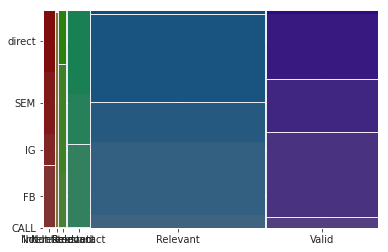

In [105]:
chisq('/content/gdrive/My Drive/data_stat_source.csv')

### Status call and media --> there is not a significant association between status call variable with media variable (0.85 p-value)

---



---




Chi-squared test

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson           10       5.56493   0.850397
Log-likelihood    10       9.11161   0.521546

Expected frequency counts

         CALL       CHAT       FORM
--  ---------  ---------  ---------
 0  0.323077    1.25641    5.42051
 1  0.0461538   0.179487   0.774359
 2  0.184615    0.717949   3.09744
 3  0.6         2.33333   10.0667
 4  4.8        18.6667    80.5333
 5  3.04615    11.8462    51.1077


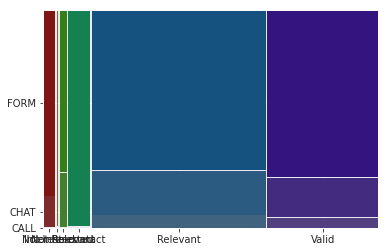

In [102]:
chisq('/content/gdrive/My Drive/data_stat_med.csv')

## Status call and source --> there is a significant association between source variable with media variable (1.62987e-36 p-value)


Chi-squared test

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson           12       201.459  1.62987e-36
Log-likelihood    12        78.327  8.59615e-12

Expected frequency counts

        CALL      CHAT      FORM    sum_media
--  --------  --------  --------  -----------
 0  0.415385   1.61538   6.96923            9
 1  3.23077   12.5641   54.2051            70
 2  1.89231    7.35897  31.7487            41
 3  3.18462   12.3846   53.4308            69
 4  0.276923   1.07692   4.64615            6


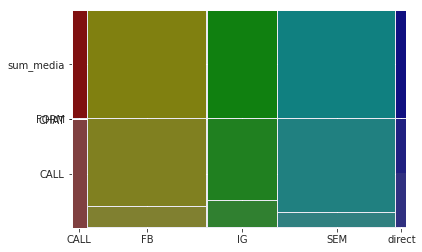

In [104]:
chisq('/content/gdrive/My Drive/data_source_med.csv')